In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#using 2 antennas
dataset = pd.read_csv('human_walking_direction_elbatanony_421.csv').drop('Unnamed: 0',axis=1)

1. We collected 100 packets every 5 secs for each behavior. 
2. 2000 samples for left, right, and no_person. 1000 samples for up.
3. We have 56 subcarrier and we will use 30 subcarriers
4. We have 2 * 2 antennas. So, we have four csi values at receiver (1_1, 1_2, 2_1, 2_2)=>(i_j), i for receiver and j for transmitter.
5. I will loop for each subcarrier and select 100 values for packet num for example subcarrier 0 contains 2000 values for no of packets, So 2000/100-> 20 behavior.
6. We have 30 subcarriers, then we will have 20*30=600 rows for left, right, and no person but for up 1000/100 * 30=300 therefore the total number of rows=600+600+600+300=2100
7. for columns, We have 100 packet for each antenna pair then 100*4=400 therefore We have 400 amplitudes, 400 phases and label col then the total number of columns=801
8. Therefore for each row we have the amplitudes and phases for 100 packets (one behavior)



1. s_n -> subcarrier num
2. a_n -> antenna_num
3. d_n -> data_num
4. tp_n ->  total number of packets for each behavior
5. tb_n ->  total number of behaviors for each activty
6. N  -> activities number
7. TR_n -> total number of rows
8. TC_n -> total number of columns
9. tb_n= d_n/tp_n    ->          (tb_n= 2000/100 =20   , tb_n= 1000/100 =10)
10. TR_n= tb_n*s_n*N   ->         (TR_n = 20*30*3 + 10*30*1=1800+300=2100)
11. TC_n= (tp_n * a_n  * 2) + 1  ->   (TC_n= (100*4*2)+1 = 801)
12. DS_n = TR_n * TC_n ->  (2100*801)

 

In [3]:
dataset.head()

,phase antenna1_1:0,phase antenna1_1:1,phase antenna1_1:2,phase antenna1_1:3,phase antenna1_1:4,phase antenna1_1:5,phase antenna1_1:6,phase antenna1_1:7,phase antenna1_1:8,phase antenna1_1:9,...,phase antenna2_2:391,phase antenna2_2:392,phase antenna2_2:393,phase antenna2_2:394,phase antenna2_2:395,phase antenna2_2:396,phase antenna2_2:397,phase antenna2_2:398,phase antenna2_2:399,label
0,1.916725,3.139848,2.338860,2.140146,2.781944,0.766939,2.502531,1.555434,1.568822,0.680765,...,1.247599,0.258984,2.456885,-0.351929,-0.622513,0.224466,-1.213963,-0.972859,-1.208178,left_direction
1,0.816399,1.285865,1.993688,3.116603,1.020720,1.569002,0.525442,1.154629,1.998043,1.290066,...,-6.059594,1.817915,-1.716796,0.952157,-0.680600,-1.003848,0.331014,-0.277250,0.098659,left_direction
2,1.660661,1.830227,1.750338,2.649289,2.222062,1.978837,8.875046,-2.634495,-1.809395,8.049807,...,-1.403864,-0.691014,5.014720,-1.423656,0.520230,-0.885333,0.027910,-0.014237,-0.643035,left_direction
3,-3.966948,0.657757,-3.347278,-2.672180,-8.642773,2.169487,-2.311631,1.504317,-2.980221,-5.307595,...,-0.318752,0.696146,-2.402680,0.203666,-2.432829,0.043026,-0.428064,-1.296164,0.945840,left_direction
4,1.160943,1.532499,1.348613,2.213921,1.760274,2.226778,1.607853,0.889894,0.400431,-3.340311,...,-0.026559,0.115755,-0.529473,-0.324775,-0.354857,0.356410,-0.865391,-0.050983,-0.823402,left_direction


C:\Users\hanan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


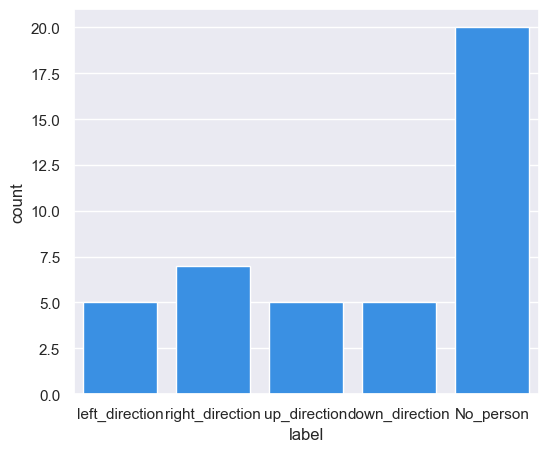

In [4]:
import seaborn as sns

sns.set(color_codes=True)

plt.figure(0, (6, 5))
sns_plot = sns.countplot(dataset['label'], color="dodgerblue", label="Compact")


# Train the dataset

In [5]:
#Data encoding: to convert categorical features to numberical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['label']=label_encoder.fit_transform(dataset['label'])

In [6]:
dataset

,phase antenna1_1:0,phase antenna1_1:1,phase antenna1_1:2,phase antenna1_1:3,phase antenna1_1:4,phase antenna1_1:5,phase antenna1_1:6,phase antenna1_1:7,phase antenna1_1:8,phase antenna1_1:9,...,phase antenna2_2:391,phase antenna2_2:392,phase antenna2_2:393,phase antenna2_2:394,phase antenna2_2:395,phase antenna2_2:396,phase antenna2_2:397,phase antenna2_2:398,phase antenna2_2:399,label
0,1.916725,3.139848,2.338860,2.140146,2.781944,0.766939,2.502531,1.555434,1.568822,0.680765,...,1.247599,0.258984,2.456885,-0.351929,-0.622513,0.224466,-1.213963,-0.972859,-1.208178,2
1,0.816399,1.285865,1.993688,3.116603,1.020720,1.569002,0.525442,1.154629,1.998043,1.290066,...,-6.059594,1.817915,-1.716796,0.952157,-0.680600,-1.003848,0.331014,-0.277250,0.098659,2
2,1.660661,1.830227,1.750338,2.649289,2.222062,1.978837,8.875046,-2.634495,-1.809395,8.049807,...,-1.403864,-0.691014,5.014720,-1.423656,0.520230,-0.885333,0.027910,-0.014237,-0.643035,2
3,-3.966948,0.657757,-3.347278,-2.672180,-8.642773,2.169487,-2.311631,1.504317,-2.980221,-5.307595,...,-0.318752,0.696146,-2.402680,0.203666,-2.432829,0.043026,-0.428064,-1.296164,0.945840,2
4,1.160943,1.532499,1.348613,2.213921,1.760274,2.226778,1.607853,0.889894,0.400431,-3.340311,...,-0.026559,0.115755,-0.529473,-0.324775,-0.354857,0.356410,-0.865391,-0.050983,-0.823402,2
5,7.941572,-1.855048,-2.270134,2.335110,2.070719,-1.844555,-2.703480,1.977017,-6.272342,-1.782921,...,0.299336,0.597269,-0.915028,-0.625727,0.307035,-0.601788,-0.192644,0.420419,-0.352439,3
6,2.949525,2.652910,1.003195,2.542431,2.886337,-2.640179,-0.345451,1.890858,-2.546687,1.481455,...,0.801324,-0.182517,-0.484538,-0.678386,5.549726,-0.463456,-1.721149,-0.807948,-1.241007,3
7,-4.223187,1.469776,2.301254,2.669810,2.459705,1.614752,-4.369107,0.270685,2.359070,1.307338,...,-0.607481,-1.030309,0.605693,0.360240,-0.374965,0.412711,0.974501,-1.228382,0.325485,3
8,6.461859,1.512431,2.813906,3.101530,1.472267,2.002979,2.718053,2.808589,6.524415,1.882892,...,-0.955115,0.483998,0.497169,0.421294,-0.421752,-0.847170,-1.077044,-0.781228,-0.859425,3
9,1.665622,2.692400,2.009016,1.403163,1.774361,-3.332555,2.723654,2.385936,1.553777,-3.258240,...,-0.535023,-0.920763,0.236041,0.217808,-1.212193,-1.313638,-1.248796,-0.535679,-0.131076,3


In [7]:
dataset['label'].unique()

array([2, 3, 4, 1, 0])

In [8]:
y=dataset['label']

In [9]:
X=dataset.drop('label',axis=1)

In [10]:
y

0     2
1     2
2     2
3     2
4     2
5     3
6     3
7     3
8     3
9     3
10    3
11    3
12    4
13    4
14    4
15    4
16    4
17    1
18    1
19    1
20    1
21    1
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
Name: label, dtype: int32

In [11]:
#Trainset Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y,  test_size=0.5,random_state=123)

In [12]:
X_train.shape

(21, 1600)

In [13]:
X_test.shape

(21, 1600)

 2      3     4    1    0:
left   right  up  down  No

# classification using ML models

In [14]:
RF_Accuracy=[]
SVM_Accuracy=[]
KNN_Accuracy=[]

# 1. Random Forest Classifier

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sklearn.ensemble import RandomForestClassifier

classifier_rfc=RandomForestClassifier(max_depth=12)
classifier_rfc.fit(X_train,y_train)
y_pred_rfc=classifier_rfc.predict(X_train)
print("the accuracy of training data: ", accuracy_score(y_train,y_pred_rfc))
y_pred_rfc_test=classifier_rfc.predict(X_test)
print("the accuracy of testing data:  ", accuracy_score(y_test,y_pred_rfc_test))
RF_Accuracy.append(accuracy_score(y_test,y_pred_rfc_test))

the accuracy of training data:  1.0
the accuracy of testing data:   0.47619047619047616


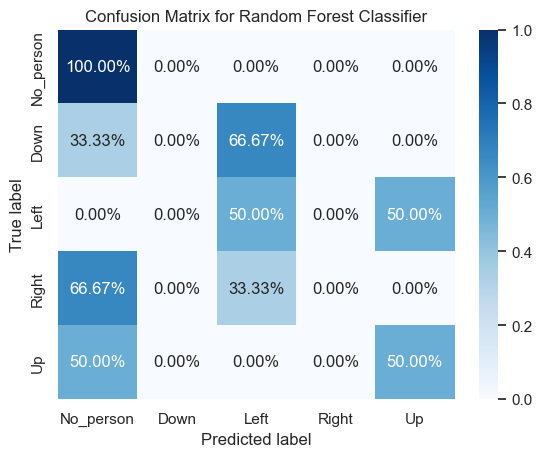

In [17]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc_test, normalize='true')
class_names = ["No_person","Down","Left","Right", "Up"]

# Plot confusion matrix as heatmap

sns.heatmap(cm_rfc, annot=True, cmap="Blues", fmt=".2%", vmin=0, vmax=1,xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [18]:
precision_rfc = precision_score(y_test, y_pred_rfc_test, average='micro')
recall_rfc = recall_score(y_test, y_pred_rfc_test, average='micro')
f1_rfc = f1_score(y_test, y_pred_rfc_test, average='micro')
accuracy_rfc = accuracy_score(y_test, y_pred_rfc_test)

print('Different metrics for testing data')
print("Precision: ", precision_rfc)
print("Recall: ", recall_rfc)
print("F1 score: ", f1_rfc)
print("Accuracy: ", accuracy_rfc)

Different metrics for testing data
Precision:  0.47619047619047616
Recall:  0.47619047619047616
F1 score:  0.47619047619047616
Accuracy:  0.47619047619047616


In [19]:
report_rfc = classification_report(y_test, y_pred_rfc_test)
print("Classification report for Random Forest:")
print(report_rfc)

Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         8
           1       0.00      0.00      0.00         3
           2       0.20      0.50      0.29         2
           3       0.00      0.00      0.00         6
           4       0.50      0.50      0.50         2

    accuracy                           0.48        21
   macro avg       0.25      0.40      0.30        21
weighted avg       0.28      0.48      0.35        21



C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Random Forest')

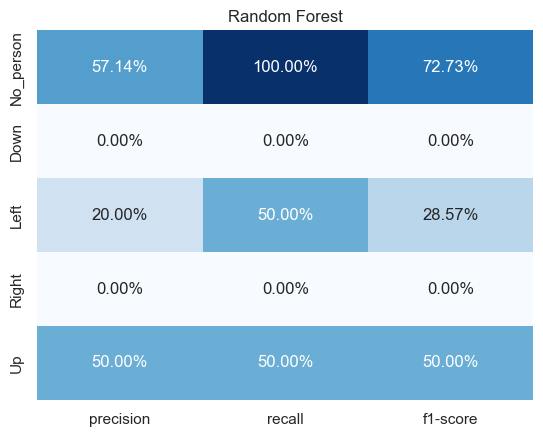

In [20]:
report_rfc = classification_report(y_test, y_pred_rfc_test, output_dict=True)
report_rfc_df = pd.DataFrame(report_rfc).transpose()
class_names = ["No_person","Down","Left","Right", "Up"]
report_rfc_df=report_rfc_df.drop(['macro avg', 'weighted avg', 'accuracy'], axis=0)
report_rfc_df=report_rfc_df.drop(['support'], axis=1)
sns.heatmap(report_rfc_df, annot=True, cmap='Blues', fmt='.2%', cbar=False, yticklabels=class_names)
plt.title("Random Forest")


# 1.2 Support Vector Machine

In [21]:
from sklearn import svm
classifier_svm = svm.SVC(kernel='linear')
classifier_svm.fit(X_train,y_train)
y_pred_svm=classifier_svm.predict(X_train)
print("the accuracy of training data: ", accuracy_score(y_train,y_pred_svm))
y_pred_svm_test=classifier_svm.predict(X_test)
print("the accuracy of testing data:  ", accuracy_score(y_test,y_pred_svm_test))
SVM_Accuracy.append(accuracy_score(y_test,y_pred_svm_test))

the accuracy of training data:  1.0
the accuracy of testing data:   0.38095238095238093


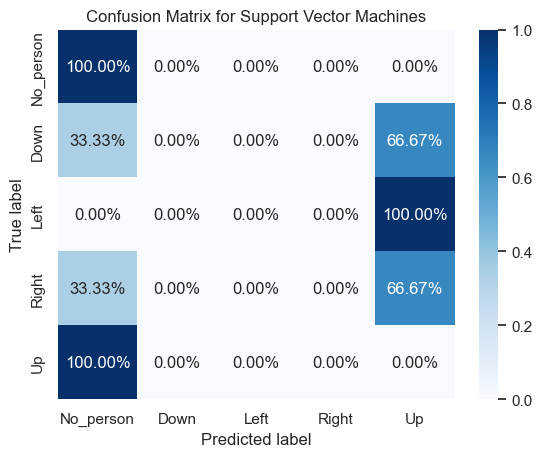

In [22]:
cm_svm = confusion_matrix(y_test, y_pred_svm_test, normalize='true')
class_names = ["No_person","Down","Left","Right", "Up"]

# Plot confusion matrix as heatmap

sns.heatmap(cm_svm, annot=True, cmap="Blues", fmt=".2%", vmin=0, vmax=1,xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for Support Vector Machines")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [23]:
precision_svm = precision_score(y_test, y_pred_svm_test, average='micro')
recall_svm = recall_score(y_test, y_pred_svm_test, average='micro')
f1_svm = f1_score(y_test, y_pred_svm_test, average='micro')
accuracy_svm = accuracy_score(y_test, y_pred_svm_test)

print('Different metrics for testing data')
print("Precision: ", precision_svm)
print("Recall: ", recall_svm)
print("F1 score: ", f1_svm)
print("Accuracy: ", accuracy_svm)

Different metrics for testing data
Precision:  0.38095238095238093
Recall:  0.38095238095238093
F1 score:  0.38095238095238093
Accuracy:  0.38095238095238093


In [24]:
report_svm = classification_report(y_test, y_pred_svm_test)
print("Classification report for Support Vector Machines:")
print(report_svm)

Classification report for Support Vector Machines:
              precision    recall  f1-score   support

           0       0.62      1.00      0.76         8
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.38        21
   macro avg       0.12      0.20      0.15        21
weighted avg       0.23      0.38      0.29        21



C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Support Vector Machines')

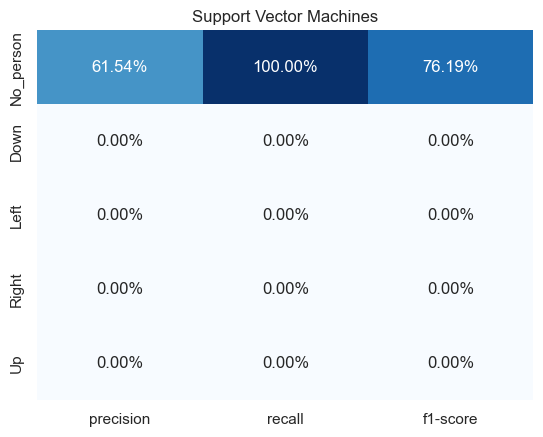

In [25]:
report_svm = classification_report(y_test, y_pred_svm_test, output_dict=True)
report_svm_df = pd.DataFrame(report_svm).transpose()
class_names = ["No_person","Down","Left","Right", "Up"]
report_svm_df=report_svm_df.drop(['macro avg', 'weighted avg', 'accuracy'], axis=0)
report_svm_df=report_svm_df.drop(['support'], axis=1)
sns.heatmap(report_svm_df, annot=True, cmap='Blues', fmt='.2%', cbar=False, yticklabels=class_names)
plt.title("Support Vector Machines")


# 1.3 K-Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=3,weights='distance',p=1)
classifier_knn.fit(X_train,y_train)
y_pred_knn=classifier_knn.predict(X_train)
print("the accuracy of training data: ", accuracy_score(y_train,y_pred_knn))
y_pred_knn_test=classifier_knn.predict(X_test)
print("the accuracy of testing data:  ", accuracy_score(y_test,y_pred_knn_test))
KNN_Accuracy.append(accuracy_score(y_test,y_pred_knn_test))

the accuracy of training data:  1.0
the accuracy of testing data:   0.42857142857142855


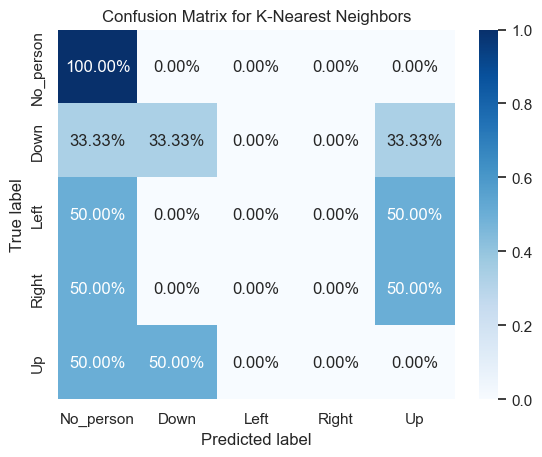

In [27]:
cm_knn = confusion_matrix(y_test, y_pred_knn_test, normalize='true')
class_names = ["No_person","Down","Left","Right", "Up"]

# Plot confusion matrix as heatmap

sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt=".2%", vmin=0, vmax=1,xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [28]:
precision_knn = precision_score(y_test, y_pred_knn_test, average='micro')
recall_knn = recall_score(y_test, y_pred_knn_test, average='micro')
f1_knn = f1_score(y_test, y_pred_knn_test, average='micro')
accuracy_knn = accuracy_score(y_test, y_pred_knn_test)

print('Different metrics for testing data')
print("Precision: ", precision_knn)
print("Recall: ", recall_knn)
print("F1 score: ", f1_knn)
print("Accuracy: ", accuracy_knn)

Different metrics for testing data
Precision:  0.42857142857142855
Recall:  0.42857142857142855
F1 score:  0.42857142857142855
Accuracy:  0.42857142857142855


In [29]:
report_knn = classification_report(y_test, y_pred_knn_test)
print("Classification report for K-Nearest Neighbors:")
print(report_knn)

Classification report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         8
           1       0.50      0.33      0.40         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.43        21
   macro avg       0.21      0.27      0.23        21
weighted avg       0.29      0.43      0.33        21



C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'K-Nearest Neighbors')

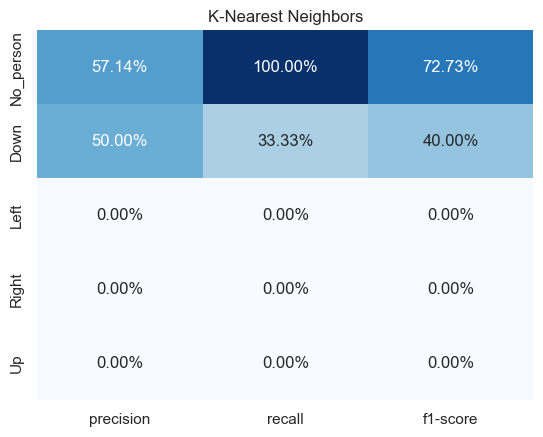

In [30]:
report_knn = classification_report(y_test, y_pred_knn_test, output_dict=True)
report_knn_df = pd.DataFrame(report_knn).transpose()
class_names = ["No_person","Down","Left","Right", "Up"]
report_knn_df=report_knn_df.drop(['macro avg', 'weighted avg', 'accuracy'], axis=0)
report_knn_df=report_knn_df.drop(['support'], axis=1)
sns.heatmap(report_knn_df, annot=True, cmap='Blues', fmt='.2%', cbar=False, yticklabels=class_names)
plt.title("K-Nearest Neighbors")


In [31]:
RF_accuracy=pd.DataFrame(data=RF_Accuracy[0:],
                columns=['RF'])

SVM_accuracy=pd.DataFrame(data=SVM_Accuracy[0:],
                columns=['SVM'])

KNN_accuracy=pd.DataFrame(data=KNN_Accuracy[0:],
                columns=['KNN'])
df_accuracy_new = pd.concat([RF_accuracy,SVM_accuracy,KNN_accuracy], axis=1)
df_accuracy_existing = pd.read_csv('human_walking_direction_df_accuracy_all_volunteers.csv').drop('Unnamed: 0',axis=1)
df_accuracy = df_accuracy_existing.append(df_accuracy_new, ignore_index=True)
df_accuracy

C:\Users\hanan\AppData\Local\Temp\ipykernel_25960\3372602396.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_accuracy = df_accuracy_existing.append(df_accuracy_new, ignore_index=True)


,RF,SVM,KNN
0,0.450000,0.450000,0.500000
1,0.550000,0.600000,0.700000
2,0.600000,0.550000,0.500000
3,0.550000,0.550000,0.500000
4,0.380952,0.428571,0.380952
5,0.500000,0.550000,0.500000
6,0.523810,0.571429,0.571429
7,0.450000,0.550000,0.600000
8,0.476190,0.380952,0.428571


In [32]:
df_accuracy.to_csv(r'human_walking_direction_df_accuracy_all_volunteers.csv')